In [2]:
import pandas as pd
conso_men = pd.read_csv("../datasets/consommation/conso-menages-2024.csv")
# Renommer la catégorie
conso_men['Famille de produits'] = conso_men['Famille de produits'].replace(
    'Céréales et produits à base de céréales', 
    'Riz, pâtes et céréales'
)
#conso_men['Famille de produits'].unique()
conso_men


,Famille de produits,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"Céréales et produits à base de céréales (riz, ...",14 370,14 978,15 509,15 838,16 296,16 485,16 806,17 210,18 478,...,21 600,22 240,23 186,23 891,24 870,25 314,27 203,29 622,33 310,34 694
1,Viandes,22 455,23 868,24 597,25 185,25 508,26 056,26 551,27 155,27 834,...,30 989,30 725,30 574,30 389,30 259,32 812,31 621,31 628,33 716,33 306
2,Poissons et autres fruits de mer,5 742,6 009,6 216,6 488,6 472,6 459,6 713,6 863,6 944,...,7 307,7 485,7 408,7 271,7 309,7 783,7 837,7 513,7 502,7 301
3,"Lait, produits laitiers divers et œufs",12 646,13 417,13 934,14 394,14 629,14 751,14 992,15 491,17 075,...,18 515,18 411,18 608,19 014,19 444,20 621,20 120,21 389,24 539,24 892
4,Huiles et graisses,2 575,2 620,2 641,2 660,2 673,2 680,2 786,2 751,2 980,...,3 093,3 050,3 152,3 307,3 425,3 755,3 538,3 900,4 211,4 338
5,Fruits et fruits à coque,5 395,6 026,6 478,6 708,6 917,6 994,7 196,7 335,7 524,...,9 207,9 898,9 991,10 252,10 371,11 492,11 197,11 799,12 038,12 235
6,"Légumes, tubercules, bananes plantains, banane...",9 613,10 141,10 595,10 940,10 712,11 040,11 533,11 987,12 168,...,14 601,15 350,15 425,15 825,16 843,18 124,17 704,18 444,20 004,20 276
7,"Sucre, confiserie et desserts",7 049,7 411,7 704,8 280,8 501,8 587,8 642,8 743,9 368,...,10 814,10 950,11 204,11 375,11 382,11 911,11 930,12 402,13 782,14 103
8,Plats préparés et autres produits alimentaires,7 891,8 307,8 721,9 268,9 893,10 265,10 653,11 215,12 040,...,13 902,14 437,15 107,15 279,15 670,16 627,17 410,18 550,20 066,20 529
9,Jus de fruits et de légumes,1 451,1 528,1 587,1 763,1 804,1 946,2 012,2 162,2 356,...,2 744,2 728,2 812,2 811,2 777,2 758,2 681,2 795,2 899,2 817


In [3]:
# 1. Préparation des données
# Fonction pour nettoyer les nombres
def clean_number(x):
    if isinstance(x, str):
        # Remplacer les espaces insécables et les espaces normaux, puis la virgule par un point
        return float(x.replace('\u202f', '').replace(' ', '').replace(',', '.'))
    return float(x)

# Nettoyage des colonnes numériques
for col in conso_men.columns[1:]:  # Toutes les colonnes sauf la première
    conso_men[col] = conso_men[col].apply(clean_number)

# 2. Création d'un graphique à barres empilées
import plotly.express as px

# Transformer les données pour le format long
df_melted = conso_men.melt(
    id_vars=['Famille de produits'], 
    var_name='Année', 
    value_name='Dépenses'
)

# Création du graphique à barres empilées
fig = px.bar(
    df_melted, 
    x='Année', 
    y='Dépenses', 
    color='Famille de produits',
    title='<b>Répartition des dépenses par famille de produits (2000-2024)</b>',
    labels={'Dépenses': 'Dépenses (en millions d\'euros)'},
    height=800,  # Hauteur augmentée pour accommoder la légende en bas
    width=900   # Largeur augmentée
)

# Améliorer la lisibilité
fig.update_layout(
    xaxis_tickangle=-45,
    legend_title_text='<b>Famille de produits</b>',
    legend=dict(
        orientation="v",  # Légende verticale
        yanchor="top",    # Ancrage en haut
        y=-0.15,          # Position sous le graphique (valeur négative pour descendre)
        xanchor="center", # Centrage horizontal
        x=0.5,            # Position horizontale centrée
        font=dict(size=10),  # Taille de police de la légende
        itemsizing='constant',  # Taille constante des symboles
        itemwidth=30,      # Largeur des items de légende
        traceorder='normal'  # Ordre normal des éléments
    ),
    title=dict(
        y=0.95,          # Position verticale du titre (0-1)
        x=0.5,           # Position horizontale centrée
        xanchor='center', # Ancrage du titre
        yanchor='top'    # Ancrage en haut
    ),
    title_font_size=24,  # Taille du titre augmentée
    font=dict(size=11),  # Taille de police générale
    margin=dict(l=50, r=50, t=150, b=250),  # Marge inférieure augmentée pour la légende
    xaxis=dict(
        title_font=dict(size=14),  # Taille du titre de l'axe X
        tickfont=dict(size=12)     # Taille des étiquettes de l'axe X
    ),
    yaxis=dict(
        title_font=dict(size=14),  # Taille du titre de l'axe Y
        tickfont=dict(size=12)     # Taille des étiquettes de l'axe Y
    )
)

# Désactiver l'affichage des valeurs sur les barres
fig.update_traces(
    texttemplate='',  # Pas de texte sur les barres
    textposition='none'
)

# Ajuster l'espacement entre les barres
fig.update_layout(bargap=0.2)

# Afficher la grille pour une meilleure lisibilité
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

fig.show()

In [5]:
# 1. Préparation des données (si ce n'est pas déjà fait)
def clean_number(x):
    if isinstance(x, str):
        return float(x.replace('\u202f', '').replace(' ', '').replace(',', '.'))
    return float(x)

for col in conso_men.columns[1:]:
    conso_men[col] = conso_men[col].apply(clean_number)

# 2. Création du graphique avec sélecteur d'année
import plotly.express as px
import pandas as pd
from ipywidgets import interact, widgets

# Création d'une liste d'années disponibles
annees = sorted(conso_men.columns[1:])  # Toutes les colonnes sauf 'Famille de produits'

# Fonction pour mettre à jour le graphique
def update_dashboard(annee):
    # Préparation des données pour l'année sélectionnée
    df_annee = conso_men[['Famille de produits', annee]].copy()
    df_annee = df_annee.rename(columns={annee: 'Dépenses'})
    
    # Préparation du top 5
    top5 = df_annee.nlargest(5, 'Dépenses').copy()
    top5['Part (%)'] = (top5['Dépenses'] / top5['Dépenses'].sum() * 100).round(1)
    
    # Création du diagramme circulaire
    fig = px.pie(
        df_annee,
        values='Dépenses',
        names='Famille de produits',
        height=800,
        width=1000,
        hole=0.3
    )
    
    # Personnalisation du graphique
    fig.update_traces(
        textposition='inside',
        textinfo='percent+label',
        textfont_size=12,
        marker=dict(line=dict(color='#FFFFFF', width=1))
    )
    
    # Création du texte pour le top 5
    top5_text = "<b>🏆 TOP 5 des dépenses :</b><br>"
    for i, (_, row) in enumerate(top5.iterrows(), 1):
        top5_text += f"{i}. {row['Famille de produits']} : {row['Dépenses']:,.0f}€ ({row['Part (%)']}%)<br>"
    
    # Ajout du top 5 comme annotation sous le titre
    fig.add_annotation(
        x=0.5,  # Centré
        y=0.95,  # Position Y augmentée pour remonter
        xref="paper",
        yref="paper",
        text=top5_text,
        showarrow=False,
        align="center",
        font=dict(size=11),
        bordercolor="#d3d3d3",
        borderwidth=1,
        borderpad=10,
        bgcolor="white",
        opacity=0.9
    )
    
    # Ajustement de la marge supérieure pour faire de la place au top 5
    fig.update_layout(
        margin=dict(l=50, r=50, t=5, b=50),  # Augmentation de la marge supérieure
        legend=dict(
            orientation="v",
            yanchor="middle",
            y=0.5,
            xanchor="left",
            x=1.05,
            font=dict(size=10)
        ),
        title=dict(
            text=f'Répartition des dépenses par famille de produits en {annee} pour les ménages français',
            y=0.98,  # Ajustement de la position du titre
            yanchor='top'
        ),
        title_font_size=18,
        showlegend=True
    )
    
    fig.show()

# Création et affichage du sélecteur d'année avec interact
interact(
    update_dashboard, 
    annee=widgets.Dropdown(
        options=annees,
        value=annees[-1],  # Dernière année par défaut
        description='Année:',
        style={'description_width': 'initial'}
    )
)

interactive(children=(Dropdown(description='Année:', index=24, options=('2000', '2001', '2002', '2003', '2004'…

<function __main__.update_dashboard(annee)>

Prédictions pour Viandes:
  2025: 34168.48 millions d'euros
  2026: 34570.69 millions d'euros
  2027: 34972.90 millions d'euros


IndexError: invalid index to scalar variable.

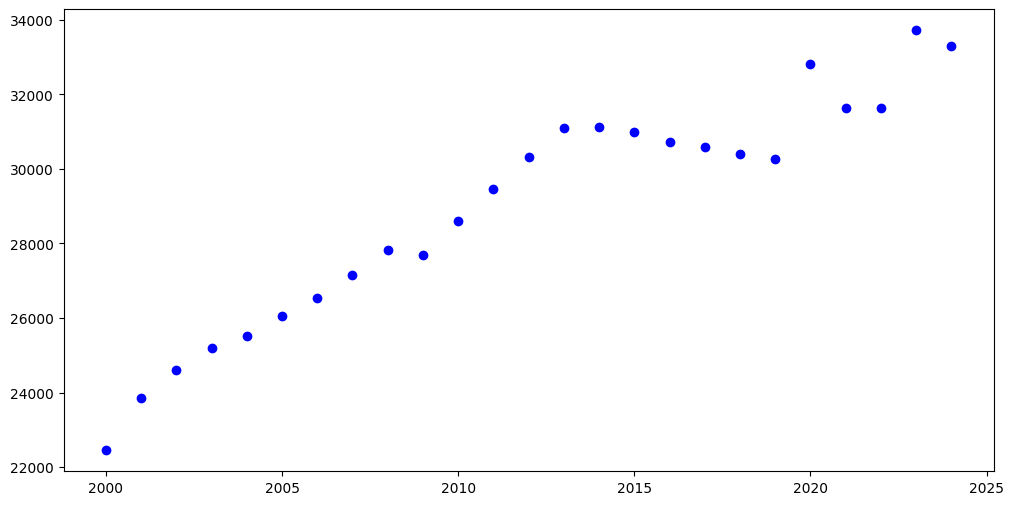

In [6]:
# 1. Préparation des données pour la régression
# Transformer les données en format long
df_melted = conso_men.melt(id_vars=['Famille de produits'], 
                          var_name='Année', 
                          value_name='Dépenses')

# Convertir l'année en numérique
df_melted['Année'] = df_melted['Année'].astype(int)

# 2. Fonction pour effectuer la régression et faire des prédictions
def predict_consumption(product_name, years_ahead=3):
    # Filtrer les données pour le produit spécifié
    product_data = df_melted[df_melted['Famille de produits'] == product_name]
    
    # Préparer les données pour la régression
    X = product_data[['Année']].values
    y = product_data['Dépenses'].values.reshape(-1, 1)
    
    # Créer et entraîner le modèle de régression linéaire
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    
    # Faire des prédictions pour les années futures
    future_years = [[2024 + i] for i in range(1, years_ahead + 1)]
    predictions = model.predict(future_years)
    
    # Afficher les résultats
    print(f"Prédictions pour {product_name}:")
    for year, pred in zip(range(2025, 2025 + years_ahead), predictions):
        print(f"  {year}: {pred[0]:.2f} millions d'euros")
    
    # Afficher le graphique
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, color='blue', label='Données historiques')
    
    # Tracer la droite de régression
    x_values = np.array([[X.min()[0]], [X.max()[0]]])
    y_values = model.predict(x_values)
    plt.plot(x_values, y_values, color='red', label='Tendance')
    
    # Ajouter les prédictions
    future_x = np.array(future_years).reshape(-1)
    plt.scatter(future_x, predictions, color='green', label='Prédictions', s=100)
    
    plt.title(f"Évolution et prévision des dépenses pour {product_name}")
    plt.xlabel('Année')
    plt.ylabel('Dépenses (millions d\'euros)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return model

# 3. Exemple d'utilisation
# Sélectionner une catégorie pour la prédiction
predict_consumption("Viandes")

Catégories disponibles :
- Autres boissons alcoolisées 
- Autres boissons non alcoolisées 
- Bière 
- Café et succédanés de café 
- Céréales et produits à base de céréales (riz, pâtes, etc)
- Eau 
- Fruits et fruits à coque 
- Huiles et graisses 
- Jus de fruits et de légumes 
- Lait, produits laitiers divers et œufs 
- Légumes, tubercules, bananes plantains, bananes de cuisine et légumes secs 
- Plats préparés et autres produits alimentaires 
- Poissons et autres fruits de mer 
- Sodas
- Spiritueux et liqueurs 
- Sucre, confiserie et desserts 
- Thé, maté et autres produits d’origine végétale pour tisanes 
- Viandes
- Vin
Prédictions pour Viandes:
  2025: 34168.48 millions d'euros
  2026: 34570.69 millions d'euros
  2027: 34972.90 millions d'euros


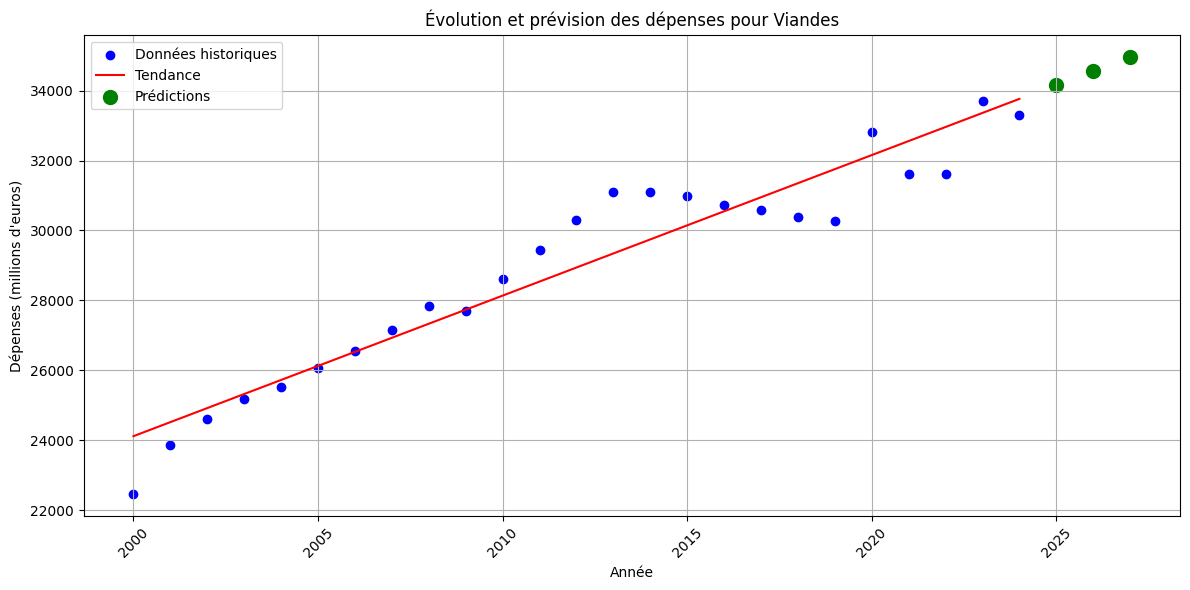

LinearRegression()

In [7]:
# 1. Fonction pour nettoyer les valeurs numériques
def clean_value(x):
    if isinstance(x, str):
        return float(x.replace(' ', '').replace(' ', '').replace(',', '.'))
    return float(x)

# 2. Préparation des données pour la régression
# Transformer les données en format long
df_melted = conso_men.melt(id_vars=['Famille de produits'], 
                          var_name='Année', 
                          value_name='Dépenses')

# Nettoyer les valeurs numériques
df_melted['Dépenses'] = df_melted['Dépenses'].apply(clean_value)
df_melted['Année'] = df_melted['Année'].astype(int)

# 3. Fonction pour effectuer la régression et faire des prédictions
def predict_consumption(product_name, years_ahead=3):
    try:
        # Filtrer les données pour le produit spécifié
        product_data = df_melted[df_melted['Famille de produits'] == product_name]
        
        if len(product_data) == 0:
            print(f"Aucune donnée trouvée pour {product_name}")
            available_products = df_melted['Famille de produits'].unique()
            print("\nCatégories disponibles :")
            for p in sorted(available_products):
                print(f"- {p}")
            return None
            
        # Séparer les caractéristiques (X) et la cible (y)
        X = product_data[['Année']].values
        y = product_data['Dépenses'].values.reshape(-1, 1)
        
        # Créer et entraîner le modèle de régression linéaire
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
        model.fit(X, y)
        
        # Faire des prédictions pour les années futures
        future_years = [[2024 + i] for i in range(1, years_ahead + 1)]
        predictions = model.predict(future_years)
        
        # Afficher les résultats
        print(f"Prédictions pour {product_name}:")
        for year, pred in zip(range(2025, 2025 + years_ahead), predictions):
            print(f"  {year}: {pred[0]:.2f} millions d'euros")
        
        # Afficher le graphique
        import matplotlib.pyplot as plt
        import numpy as np
        
        plt.figure(figsize=(12, 6))
        plt.scatter(X, y, color='blue', label='Données historiques')
        
        # Tracer la droite de régression
        x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_range = model.predict(x_range)
        plt.plot(x_range, y_range, color='red', label='Tendance')
        
        # Ajouter les prédictions
        future_x = np.array(future_years).reshape(-1)
        plt.scatter(future_x, predictions, color='green', label='Prédictions', s=100)
        
        plt.title(f"Évolution et prévision des dépenses pour {product_name}")
        plt.xlabel('Année')
        plt.ylabel('Dépenses (millions d\'euros)')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        return model
        
    except Exception as e:
        print(f"Une erreur s'est produite : {str(e)}")
        return None

# 4. Exemple d'utilisation
# Vérifier les catégories disponibles
print("Catégories disponibles :")
for category in sorted(df_melted['Famille de produits'].unique()):
    print(f"- {category}")

# Faire une prédiction pour une catégorie
predict_consumption("Viandes")